# Exploratory Data Analysis

We will be doing the following in this section

## Step 0: Getting started  
- Import libraries  
- Import dataset  

## Step 1: Data visualisation  
- Exploring Scope  
- Choosing variables  
- Visualizing individual variables  
- Visualizing variable pairs  
- Visualizing as a whole
  
## Step 2: Data analysis
- Correlation coeficients
- Reverse-engineering rank

## Step 0: Getting Started

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Import the Dataset (UserList)

The dataset is in CSV format; hence we use the read_csv function from Pandas.  
Immediately after importing, take a quick look at the data using the head function.

In [2]:
userlist = pd.read_csv('DataSets/Cleaned data/data_cleaned.csv', dtype={'airing': 'object'})
userlist.head()

,title,type,source,episodes,status,airing,rating,score,scored_by,rank,...,Related_Side story,Related_Alternative version,Related_Prequel,Related_Summary,Related_Other,Related_Spin-off,Related_Alternative setting,Related_Character,Related_Parent story,Related_Full story
0,Inu x Boku SS,TV,Manga,12,Finished Airing,False,PG-13 - Teens 13 or older,7.63,139250,1274.0,...,0,0,0,0,0,0,0,0,0,0
1,Seto no Hanayome,TV,Manga,26,Finished Airing,False,PG-13 - Teens 13 or older,7.89,91206,727.0,...,1,1,0,0,0,0,0,0,0,0
2,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,False,PG - Children,7.55,37129,1508.0,...,0,0,1,0,0,0,0,0,0,0
3,Princess Tutu,TV,Original,38,Finished Airing,False,PG-13 - Teens 13 or older,8.21,36501,307.0,...,0,0,0,1,0,0,0,0,0,0
4,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,False,PG-13 - Teens 13 or older,8.67,107767,50.0,...,0,0,2,0,1,0,0,0,0,0


## Step 1.1: Exploring scope

We see that some columns are categorical, while some are numerical.  
Let us figure out what outputs are in the categorical columns, and what range of values there are in the numerical ones.

### Printing out possible values of categorical variables

We are interested in finding out how many types of values there are for the following columns
1. Type
2. Source
3. Status
4. Rating

In [3]:
# Filtering the Type column
type_unique_values = userlist['type'].unique()

# Print the unique values for Type
print("Unique values for Type:")
for value in type_unique_values:
    print(value)
print("\n")

# Filtering the Source column
source_unique_values = userlist['source'].unique()

# Print the unique values for Source
print("Unique values for source:")
for value in source_unique_values:
    print(value)
print("\n")

# Filtering the Status column
status_unique_values = userlist['status'].unique()

# Print the unique values for Status
print("Unique values for status:")
for value in status_unique_values:
    print(value)
print("\n")

# Filtering the Rating column
rating_unique_values = userlist['rating'].unique()

# Print the unique values for Rating
print("Unique values for rating:")
for value in rating_unique_values:
    print(value)
print("\n")

# Filtering the Studio column
studio_unique_values = userlist['studio'].unique()

# Print the unique values for Studio
print("Unique values for studio:")
for value in studio_unique_values:
    print(value)
print("\n")

Unique values for Type:
TV
Music
OVA
ONA
Special
Movie


Unique values for source:
Manga
Original
Light novel
4-koma manga
Novel
Visual novel
Unknown
Music
Other
Game
Picture book
Card game
Web manga
Book
Radio
Digital manga


Unique values for status:
Finished Airing
Currently Airing


Unique values for rating:
PG-13 - Teens 13 or older
PG - Children
G - All Ages
R+ - Mild Nudity
R - 17+ (violence & profanity)
Rx - Hentai


Unique values for studio:
SmallStudio
Gonzo
Satelight
J.C.Staff
Production Reed
Bones
Studio Deen
Brain&#039;s Base
Studio Pierrot
Madhouse
Production I.G
TMS Entertainment
Tatsunoko Production
Toei Animation
Sunrise
Zexcs
unknown
Lerche
Studio 4°C
Xebec
A-1 Pictures
Kyoto Animation
OLM
Shaft
ufotable
Shin-Ei Animation
Silver Link.
DLE
Seven
Arms
Nippon Animation
Diomedea
Studio Ghibli
feel.
Doga Kobo
AIC
PoRO
Studio Hibari
Studio Gallop
Gainax
P.A. Works
Kachidoki Studio




### Printing out range of values for numerical variables

We are interested in finding out the minimum and maximum values for the following columns
1. Episodes
2. Duration
3. Score
4. Score_by
5. Rank
6. Popularity
7. Members
8. Favourites

In [4]:
# Filtering the Episodes column
episode_minimum_value = userlist['episodes'].min()
episode_maximum_value = userlist['episodes'].max()

print("Minimum value in for episode:", episode_minimum_value)
print("Maximum value in for episode:", episode_maximum_value)
print("\n")

# Filtering the Duration column
duration_minimum_value = userlist['duration_minutes'].min()
duration_maximum_value = userlist['duration_minutes'].max()

print("Minimum value in for duration:", duration_minimum_value)
print("Maximum value in for duration:", duration_maximum_value)
print("\n")

# Filtering the Score column
score_minimum_value = userlist['score'].min()
score_maximum_value = userlist['score'].max()

print("Minimum value in for score:", score_minimum_value)
print("Maximum value in for score:", score_maximum_value)
print("\n")

# Filtering the Rank column
rank_minimum_value = userlist['rank'].min()
rank_maximum_value = userlist['rank'].max()

print("Minimum value in for rank:", rank_minimum_value)
print("Maximum value in for rank:", rank_maximum_value)
print("\n")

# Filtering the Popularity column
popularity_minimum_value = userlist['popularity'].min()
popularity_maximum_value = userlist['popularity'].max()

print("Minimum value in for popularity:", popularity_minimum_value)
print("Maximum value in for popularity:", popularity_maximum_value)
print("\n")

# Filtering the Members column
member_minimum_value = userlist['members'].min()
member_maximum_value = userlist['members'].max()

print("Minimum value in for member:", member_minimum_value)
print("Maximum value in for member:", member_maximum_value)
print("\n")

# Filtering the Favourites column
favourite_minimum_value = userlist['favorites'].min()
favourite_maximum_value = userlist['favorites'].max()

print("Minimum value in for favourite:", favourite_minimum_value)
print("Maximum value in for favourite:", favourite_maximum_value)

Minimum value in for episode: 1
Maximum value in for episode: 1787


Minimum value in for duration: 0.05
Maximum value in for duration: 180.0


Minimum value in for score: 1.25
Maximum value in for score: 9.25


Minimum value in for rank: 1.0
Maximum value in for rank: 12919.0


Minimum value in for popularity: 1
Maximum value in for popularity: 14466


Minimum value in for member: 14
Maximum value in for member: 1456378


Minimum value in for favourite: 1
Maximum value in for favourite: 106895


## Step 1.2: Choosing Initial Variables

We have decided to pick 5 variables to explore, and this section breaks down what they mean and how they are calculated


### Score

Score is a weighted average of the rating that users give to a particular anime  
It is calculated using the following formula:  

(v/(v+m)) * S + (m/v+m) * C  

Where
> v = Number of users giving a score  
> m = Minimum number of scored users required to get a calculated score  
> S = Average score  
> C = Mean score across the entire datase 

We can see that S and C are essentially unweighted averages

### Rank

It is not immediately clear how rank is calculated, perhaps we can run a regression operation to reverse engineer the formula...

### Popularity

This is the number of viewers that watched a particular anime

### Members

This is the number of people who added a particular anime to one these 4 lists:  
* Watching
* Completed  
* On Hold
* Plan to watch  

### Favourites

This is the number of people who favourited a particular anime

## Step 1.3: Visualizing Individual Variables

Let us look in more detail at each chosen variable, using visual tools such as box plots and violin plots

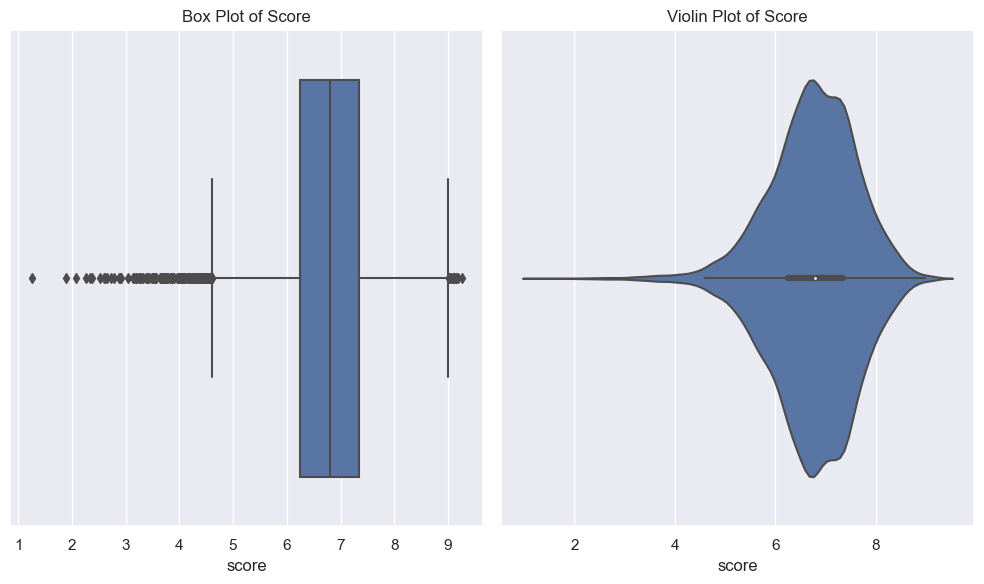

In [5]:
# Select the variable to analyze
variable = 'score'

# Set the figure size
plt.figure(figsize=(10, 6))

# Create box plot
plt.subplot(1, 2, 1)
sb.boxplot(x=userlist['score'])
plt.title(f'Box Plot of Score')

# Create violin plot
plt.subplot(1, 2, 2)
sb.violinplot(x=userlist['score'])
plt.title(f'Violin Plot of Score')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

### Score

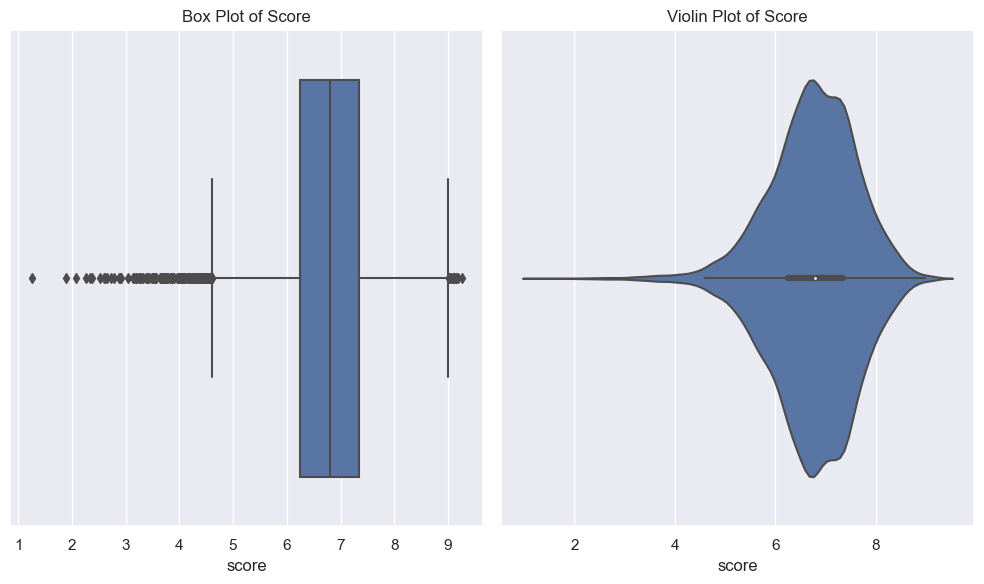

In [6]:
# Select the variable to analyze
variable = 'score'

# Set the figure size
plt.figure(figsize=(10, 6))

# Create box plot
plt.subplot(1, 2, 1)
sb.boxplot(x=userlist['score'])
plt.title(f'Box Plot of Score')

# Create violin plot
plt.subplot(1, 2, 2)
sb.violinplot(x=userlist['score'])
plt.title(f'Violin Plot of Score')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

### Rank

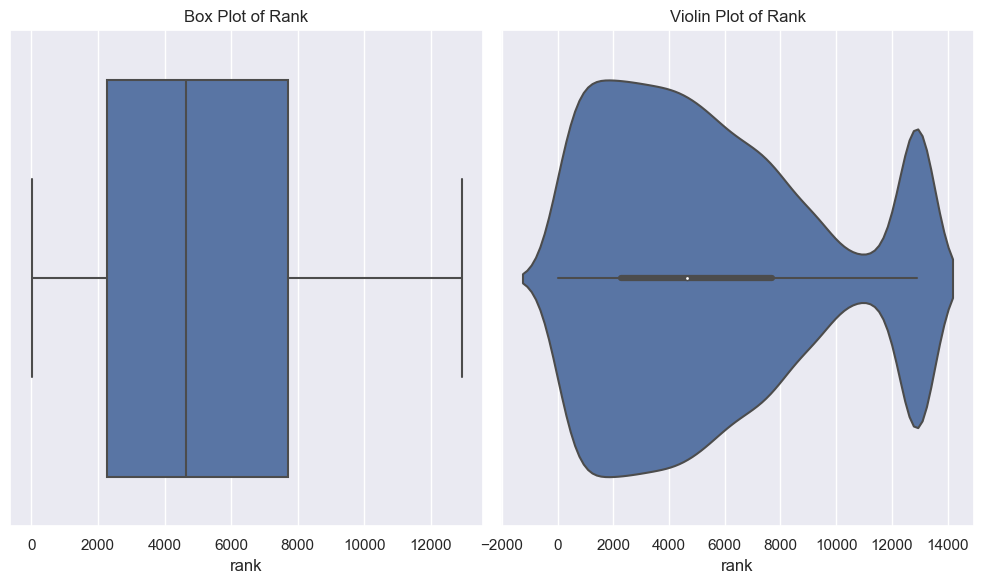

In [7]:
# Select the variable to analyze
variable = 'rank'

# Set the figure size
plt.figure(figsize=(10, 6))

# Create box plot
plt.subplot(1, 2, 1)
sb.boxplot(x=userlist['rank'])
plt.title(f'Box Plot of Rank')

# Create violin plot
plt.subplot(1, 2, 2)
sb.violinplot(x=userlist['rank'])
plt.title(f'Violin Plot of Rank')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

### Popularity

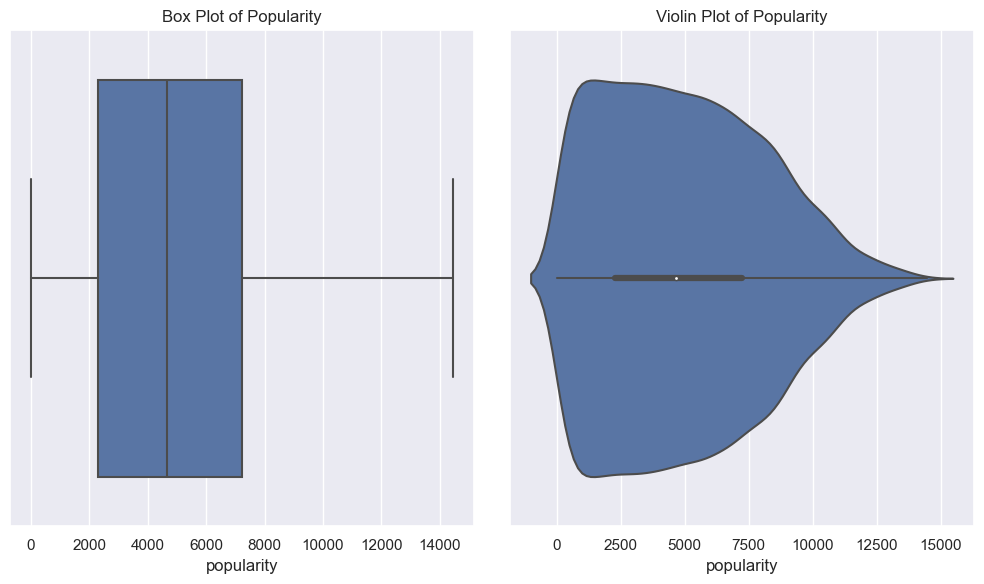

In [8]:
# Select the variable to analyze
variable = 'popularity'

# Set the figure size
plt.figure(figsize=(10, 6))

# Create box plot
plt.subplot(1, 2, 1)
sb.boxplot(x=userlist['popularity'])
plt.title(f'Box Plot of Popularity')

# Create violin plot
plt.subplot(1, 2, 2)
sb.violinplot(x=userlist['popularity'])
plt.title(f'Violin Plot of Popularity')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

### Members

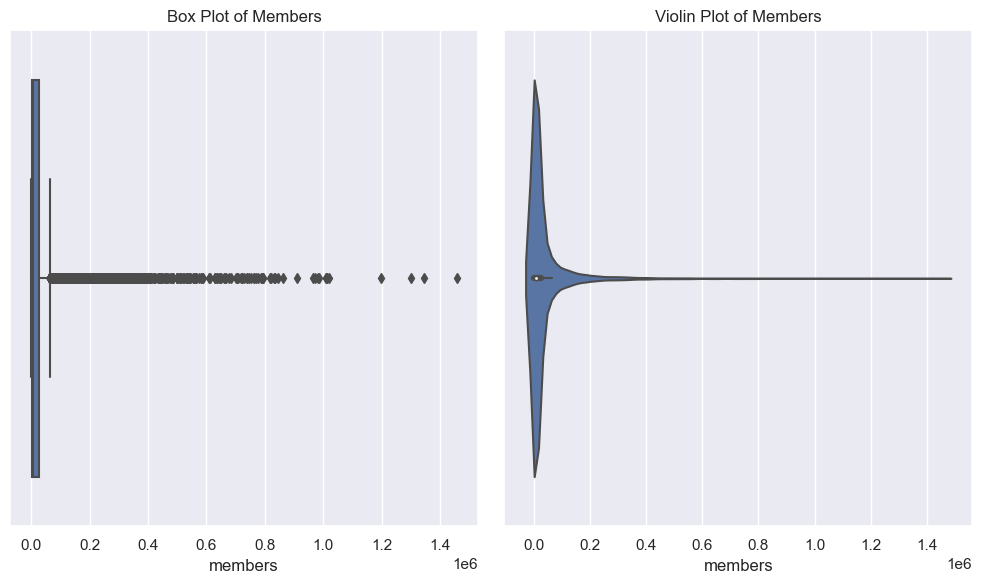

In [9]:
# Select the variable to analyze
variable = 'members'

# Set the figure size
plt.figure(figsize=(10, 6))

# Create box plot
plt.subplot(1, 2, 1)
sb.boxplot(x=userlist['members'])
plt.title(f'Box Plot of Members')

# Create violin plot
plt.subplot(1, 2, 2)
sb.violinplot(x=userlist['members'])
plt.title(f'Violin Plot of Members')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

### Favourites

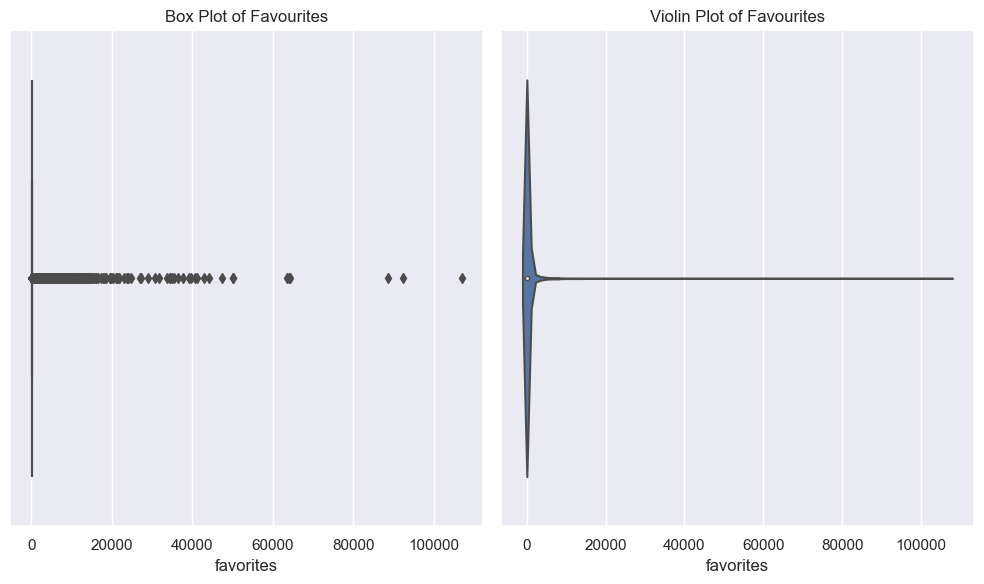

In [10]:
# Select the variable to analyze
variable = 'favorites'

# Set the figure size
plt.figure(figsize=(10, 6))

# Create box plot
plt.subplot(1, 2, 1)
sb.boxplot(x=userlist['favorites'])
plt.title(f'Box Plot of Favourites')

# Create violin plot
plt.subplot(1, 2, 2)
sb.violinplot(x=userlist['favorites'])
plt.title(f'Violin Plot of Favourites')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

## Step 1.4: Looking at chosen variables in pairs

Now that we know what the variables entail, let us compare them against one another

We will be omitting rank from this set of comparisons, because we will be looking at it in more detail later

### Score

To start, let's look at how Score stacks up against the other variables by calculating its correlation coefficient against the other variables

In [11]:
# Calculating correlation coefficient between score and popularity 
score_vs_popularity_correlation_coefficient = userlist['score'].corr(userlist['popularity'])
print(f"Correlation Coefficient between score and popularity: {score_vs_popularity_correlation_coefficient}")
print("\n")

# Calculating correlation coefficient between score and members
score_vs_members_correlation_coefficient = userlist['score'].corr(userlist['members'])
print(f"Correlation Coefficient between score and members: {score_vs_members_correlation_coefficient}")
print("\n")

# Calculating correlation coefficient between score and favourites
score_vs_favorites_correlation_coefficient = userlist['score'].corr(userlist['favorites'])
print(f"Correlation Coefficient between score and favorites: {score_vs_favorites_correlation_coefficient}")
print("\n")

Correlation Coefficient between score and popularity: -0.6446658904442298


Correlation Coefficient between score and members: 0.41256475837321505


Correlation Coefficient between score and favorites: 0.25015703432013187




Hm, score and popularity have a correlation coefficient that is higher than 0.5, so worth taking a look at later  
Members vs score and favourites vs score can be safely ruled out, to avoid recalculations

### Popularity

Popularity vs score has been calculated already, so it is omitted
Popularity vs members will not be evaluated, since they are closely related

In [12]:
# Calculating correlation coefficient between popularity and favourites
popularity_vs_favorites_correlation_coefficient = userlist['popularity'].corr(userlist['favorites'])
print(f"Correlation Coefficient between popularity and favorites: {popularity_vs_favorites_correlation_coefficient}")
print("\n")

Correlation Coefficient between popularity and favorites: -0.22156296258808914




### Members

Popularity vs members has been calculated already, so it is omitted

In [13]:
# Calculating correlation coefficient between members and favourites
members_vs_favorites_correlation_coefficient = userlist['members'].corr(userlist['favorites'])
print(f"Correlation Coefficient between members and favorites: {members_vs_favorites_correlation_coefficient}")
print("\n")

Correlation Coefficient between members and favorites: 0.7841436348000269




Members vs favourites is highly correlated, definitely worth analysing

### A closer look

Alright, here are the comparisons we picked out from earlier:  
* Score vs popularity
* Members vs favourites

Let's use a heatmap to visualize just how closely correlated they are

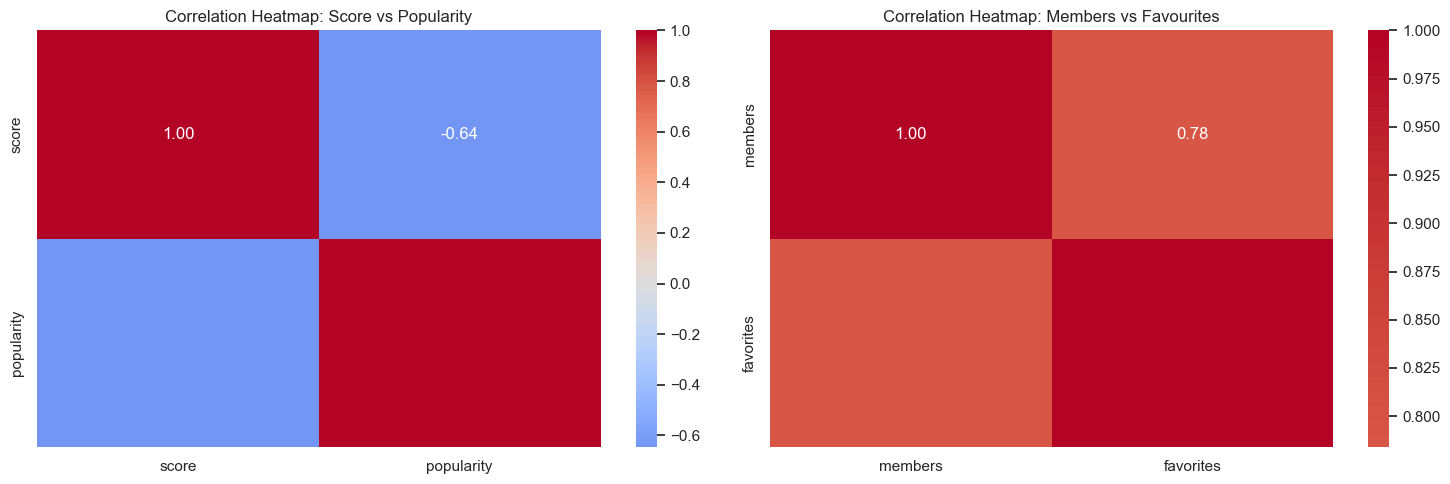

In [14]:
# Calculate the correlation matrix for each pair of variables
correlation_score_vs_popularity = userlist[['score', 'popularity']].corr()
correlation_members_vs_favorites = userlist[['members', 'favorites']].corr()

# Create subplots for the heatmaps with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Define a custom color palette for better representation of correlation
cmap = sb.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap for Score vs Popularity
sb.heatmap(correlation_score_vs_popularity, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0], center=0)
axes[0].set_title('Correlation Heatmap: Score vs Popularity')

# Plot the heatmap for Members vs Favourites
sb.heatmap(correlation_members_vs_favorites, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1], center=0)
axes[1].set_title('Correlation Heatmap: Members vs Favourites')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Let's also do a scatter plot for these comparisons, to see what the spread looks like

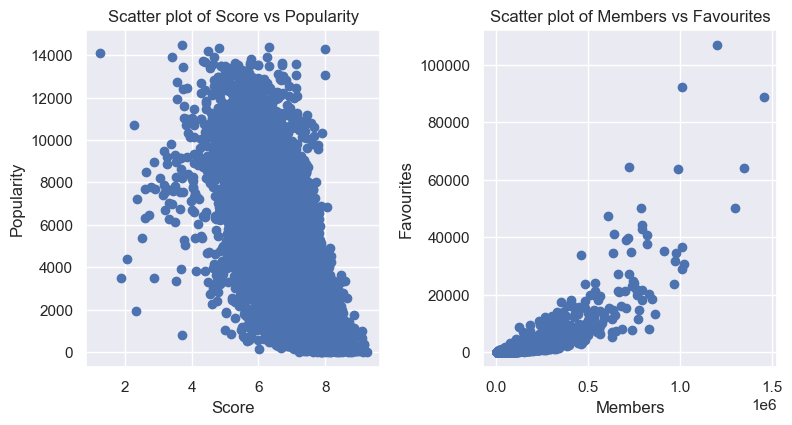

In [15]:
#Set figsize
plt.figure(figsize=(12, 12))

# Scatter plot 1: Score vs Popularity
plt.subplot(331)  
plt.scatter(userlist['score'], userlist['popularity'])
plt.xlabel('Score')
plt.ylabel('Popularity')
plt.title('Scatter plot of Score vs Popularity')

# Scatter plot 3: Members vs Favourites
plt.subplot(332) 
plt.scatter(userlist['members'], userlist['favorites'])
plt.xlabel('Members')
plt.ylabel('Favourites')
plt.title('Scatter plot of Members vs Favourites')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Step 1.5: Comparing all chosen variables

Here we utilize a pair-plot to get the big picture (note that this snippet takes a long time to run)

C:\Users\Ava Vispilio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ava Vispilio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ava Vispilio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ava Vispilio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

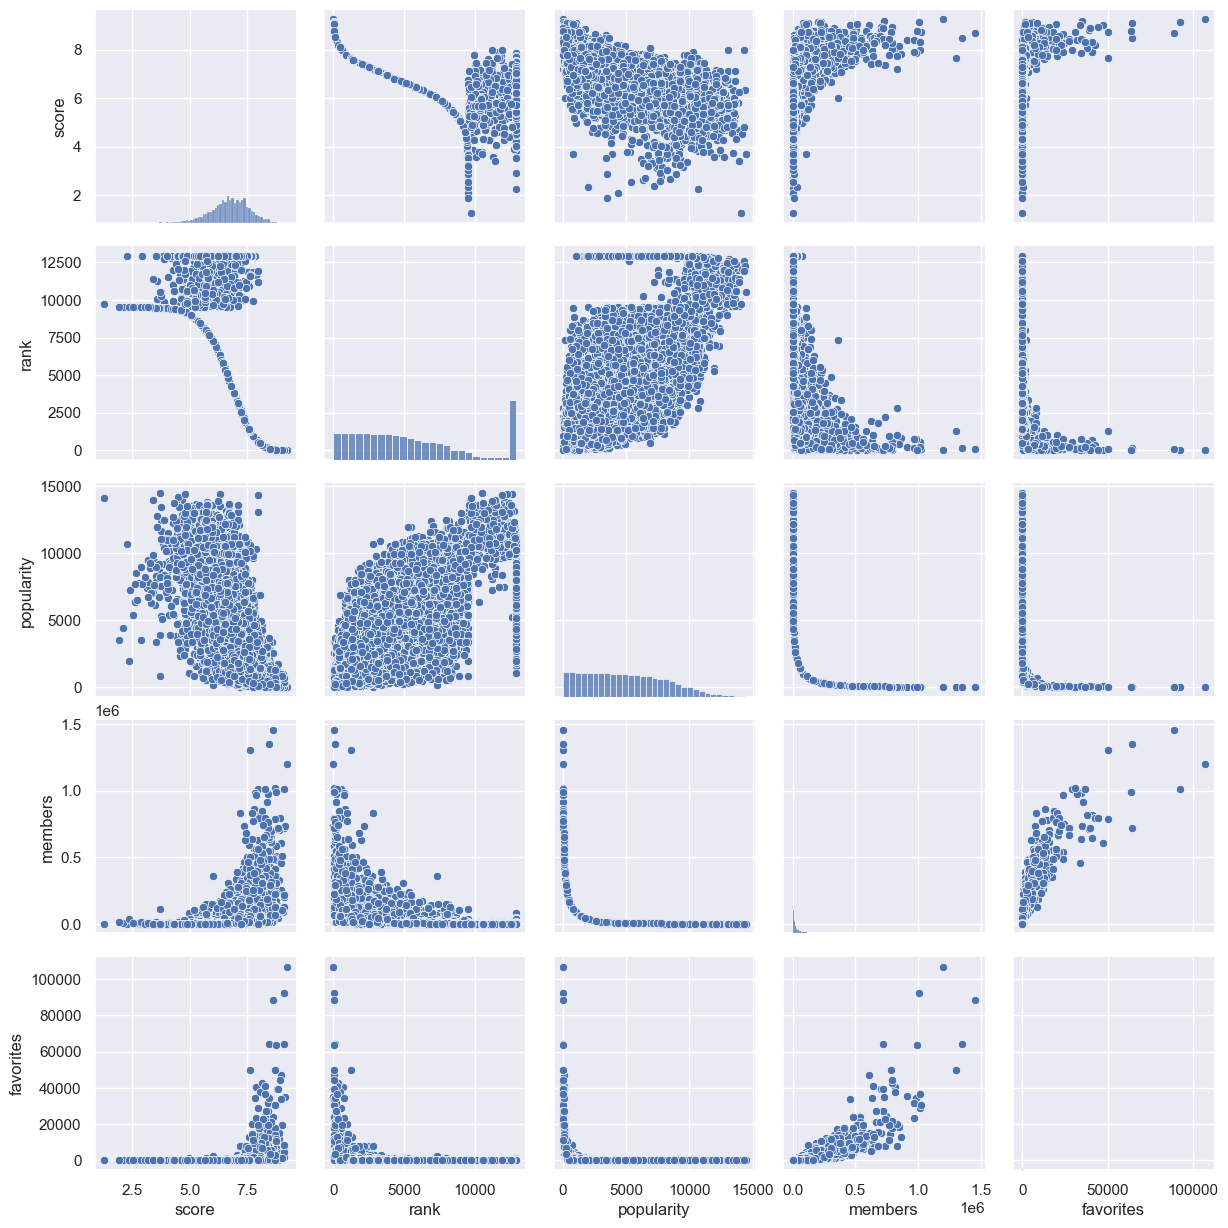

In [16]:
# Grouping the variables together
pairplot_all_variables = ['score', 'rank', 'popularity', 'members', 'favorites']

# Select the variables from the DataFrame
pairplot_selected = userlist[pairplot_all_variables]

# Create pair plot
sb.pairplot(pairplot_selected)
plt.show()

## Step 2.1: Correlation Coefficients

We look at correlation coefficients - specifically against Rank, in order to clue us into which variables to consider for reverse engineering its formula

In [17]:
# Calculating correlation coefficient between rank and score 
rank_vs_score_correlation_coefficient = userlist['rank'].corr(userlist['score'])
print(f"Correlation Coefficient between rank and score: {rank_vs_score_correlation_coefficient}")
print("\n")

# Calculating correlation coefficient between rank and popularity 
rank_vs_popularity_correlation_coefficient = userlist['rank'].corr(userlist['popularity'])
print(f"Correlation Coefficient between rank and popularity: {rank_vs_popularity_correlation_coefficient}")
print("\n")

# Calculating correlation coefficient between rank and members
rank_vs_members_correlation_coefficient = userlist['rank'].corr(userlist['members'])
print(f"Correlation Coefficient between rank and members: {rank_vs_members_correlation_coefficient}")
print("\n")

# Calculating correlation coefficient between rank and favourites
rank_vs_favorites_correlation_coefficient = userlist['rank'].corr(userlist['favorites'])
print(f"Correlation Coefficient between rank and favorites: {rank_vs_favorites_correlation_coefficient}")
print("\n")

Correlation Coefficient between rank and score: -0.7472741903705409


Correlation Coefficient between rank and popularity: 0.5911349377437705


Correlation Coefficient between rank and members: -0.35992713355015327


Correlation Coefficient between rank and favorites: -0.18334198133436994




### Evaluation

Remember that to intepret the values:  
> -1 indicates perfect negative correlation  
> 0 indicates no correlation  
> 1 indicates perfect positive correlation

With that in mind, these are the coefficients (rounded off to 5 d.p.):
* Rank and score: -0.75116
* Rank and popularity: 0.58213
* Rank and members: -0.35670
* Rank and favorites: -0.18290

From the results above, we can easily eliminate favourites as a variable, given how close its value is to 0  
Members is also up for consideration for elimination

## Step 2.2: Linear Regression

Let's try the simplest form of modelling to predict Rank as a start!

### 3-Variable Model

Since we aren't sure if Members should be included as a variable to predict Rank, let us include it first

In [18]:
# Predictor_3var contains the features (score, popularity, members) 
# Response contains the target variable (rank)
Predictor_3var = userlist[['score', 'popularity', 'members']]
Response = userlist['rank']

We then split the data into train and test sets  
Take note that a seed value of 42 was chosen here for reproducibility

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing) with a seed of 42
Predictor_3var_train, Predictor_3var_test, Response_train, Response_test = train_test_split(Predictor_3var, Response, test_size=0.2, random_state=42)

We create a linear regression model and train it using the train set

In [20]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
linear_reg_model_3var = LinearRegression()
linear_reg_model_3var.fit(Predictor_3var_train, Response_train)

LinearRegression()

After training, we use the model to predict rank on the test set  
We then plot the resulting predictions to check if anything looks unusual

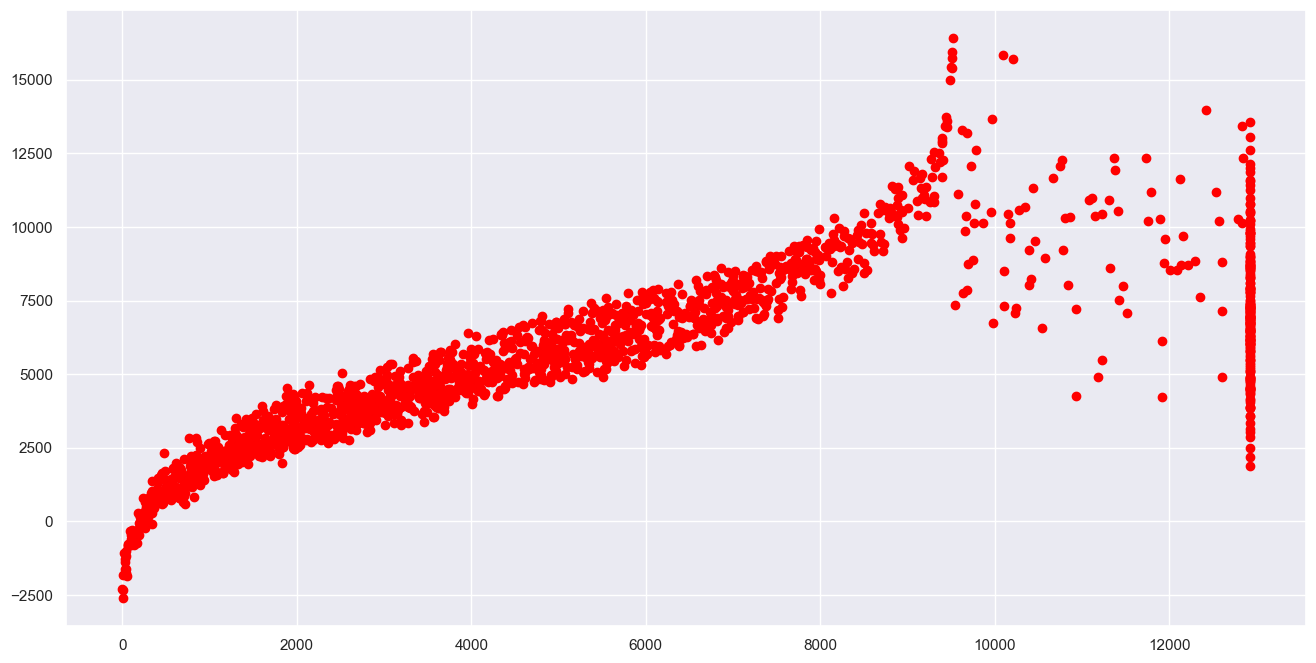

In [21]:
# Predict Rank for the test set
Rank_pred_linear_reg_3var = linear_reg_model_3var.predict(Predictor_3var_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(Response_test, Rank_pred_linear_reg_3var, color = "red")
plt.show()

To get a better evaluation of how effective the model is, we use the following metrics (rounded off the 5 d.p.):
1. Mean Squared Error (MSE): The average of the squared differences between the predicted values and the actual values
2. Root Mean Squared Error (RMSE): A measure of the average magnitude of the errors in the predicted values
3. Mean Absolute Error (MAE): The average of the absolute differences between the predicted values and the actual values
4. Coefficient of Deterimination (R^2): The proportion of the variance in the target variable that is explained by the model

In [22]:
# Calculating mean squared error
from sklearn.metrics import mean_squared_error
mse_3var = mean_squared_error(Response_test, Rank_pred_linear_reg_3var)
print(f"Mean Squared Error: {mse_3var:.5f}")

# Calculaing root mean squared error
rmse_3var = mean_squared_error(Response_test, Rank_pred_linear_reg_3var, squared = False)
print(f"Root Mean Squared Error: {rmse_3var:.5f}")

# Calculating mean absolute error
from sklearn.metrics import mean_absolute_error
mae_3var = mean_absolute_error(Response_test, Rank_pred_linear_reg_3var)
print(f"Mean Absolute Error: {mae_3var:.5f}")

# Calculating coefficient of determination
from sklearn.metrics import r2_score
r2_3var = r2_score(Response_test, Rank_pred_linear_reg_3var)
print(f"R-squared Score: {r2_3var:.5f}")

Mean Squared Error: 6033828.36311
Root Mean Squared Error: 2456.38522
Mean Absolute Error: 1615.44939
R-squared Score: 0.58972


### 2-Variable Model

Let us also try linear regression without members

In [23]:
# Predictor contains the features (score and popularity) 
# Response contains the target variable (rank)
Predictor_2var = userlist[['score', 'popularity']]
Response = userlist['rank']

We split the data again into train and test sets  
Take note that a seed value of 42 was chosen here for reproducibility

In [24]:
# Split the data into training and testing sets (80% training, 20% testing) with a seed of 42
Predictor_2var_train, Predictor_2var_test, Response_train, Response_test = train_test_split(Predictor_2var, Response, test_size=0.2, random_state=42)

After splitting the data, we create a linear regression model and train it using the train set

In [25]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
linear_reg_model_2var = LinearRegression()
linear_reg_model_2var.fit(Predictor_2var_train, Response_train)

LinearRegression()

After training, we use the model to predict rank on the test set  
We then plot the resulting predictions to check if anything looks unusual

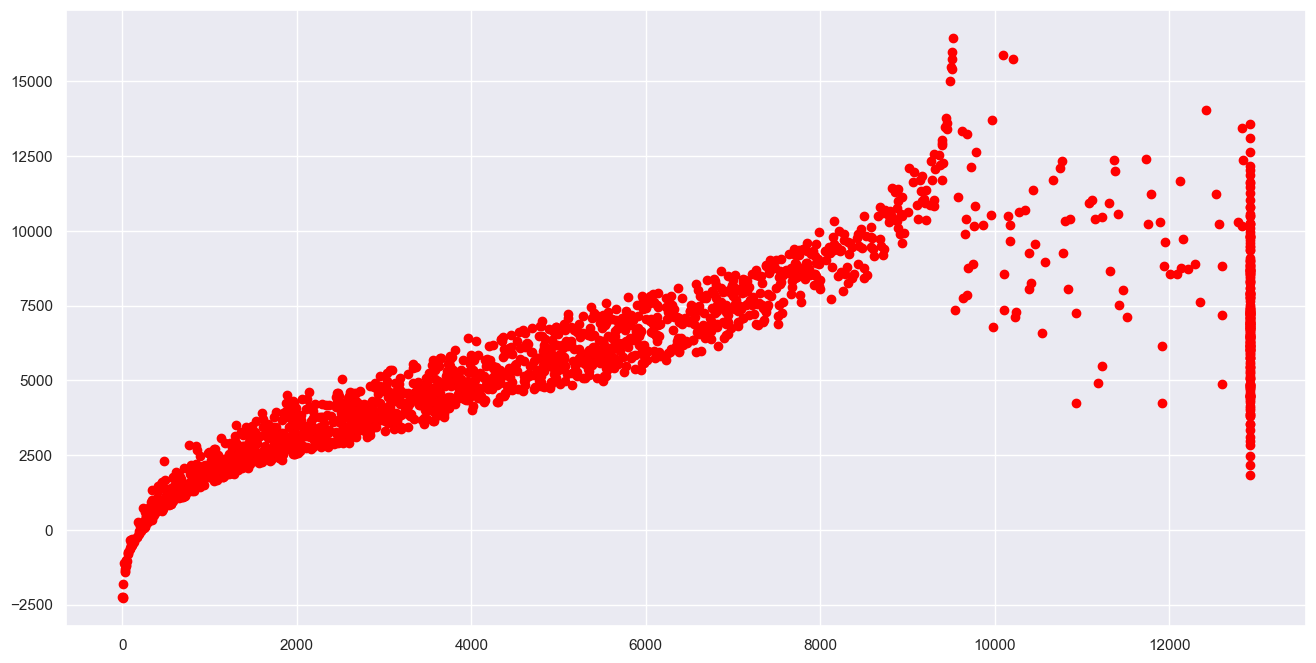

In [26]:
# Predict Rank for the test set
Rank_pred_linear_reg_2var = linear_reg_model_2var.predict(Predictor_2var_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(Response_test, Rank_pred_linear_reg_2var, color = "red")
plt.show()

To get a better evaluation of how effective the model is, we use the following metrics (rounded off the 5 d.p.):
1. Mean Squared Error (MSE): The average of the squared differences between the predicted values and the actual values
2. Root Mean Squared Error (RMSE): A measure of the average magnitude of the errors in the predicted values
3. Mean Absolute Error (MAE): The average of the absolute differences between the predicted values and the actual values
4. Coefficient of Deterimination (R^2): The proportion of the variance in the target variable that is explained by the model

In [27]:
# Calculating mean squared error
from sklearn.metrics import mean_squared_error
mse_2var = mean_squared_error(Response_test, Rank_pred_linear_reg_2var)
print(f"Mean Squared Error: {mse_2var:.5f}")

# Calculaing root mean squared error
rmse_2var = mean_squared_error(Response_test, Rank_pred_linear_reg_2var, squared = False)
print(f"Root Mean Squared Error: {rmse_2var:.5f}")

# Calculating mean absolute error
from sklearn.metrics import mean_absolute_error
mae_2var = mean_absolute_error(Response_test, Rank_pred_linear_reg_2var)
print(f"Mean Absolute Error: {mae_2var:.5f}")

# Calculating coefficient of determination
from sklearn.metrics import r2_score
r2_2var = r2_score(Response_test, Rank_pred_linear_reg_2var)
print(f"R-squared Score: {r2_2var:.5f}")

Mean Squared Error: 6031835.24243
Root Mean Squared Error: 2455.97949
Mean Absolute Error: 1607.94734
R-squared Score: 0.58986


### Evaluation

Let's compare the 4 metrics from both models to see which one is more accurate

Remember that to evaluate these metrics
> A lower MSE indicates better performance (0 lowest)
> A lower RMSE indicates better performance (0 lowest)
> A lower MAE indicates better performance (0 lowest)
> A higher R^2 indicates better performance (1 highest)

Here are the results for the 3-var model:    
* Mean Squared Error: 6033828.36311
* Root Mean Squared Error: 2456.38522
* Mean Absolute Error: 1615.44939
* R-squared Score: 0.58972

And here are the results for the 2-var model:    
* Mean Squared Error: 6031835.24243
* Root Mean Squared Error: 2455.97949
* Mean Absolute Error: 1607.94734
* R-squared Score: 0.58986

We can see that they are extremely close, with R^2 scores only differing by around 0.00014. In fact, MSE, RMSE and MAE are all reduced when Members has been removed!    

Thus, we conclude that Members is indeed not a very helpful metric for determining Rank, so it can be safely removed

### Retrieving the formula

Now that we have our chosen model, let us retrieve the exact coefficients and intercepts that were used to generate it

In [28]:
# Retrieve the coefficients and intercept
coefficients_2var = linear_reg_model_2var.coef_
intercept_2var = linear_reg_model_2var.intercept_

# Construct the formula
formula = f"Rank = {intercept_2var:.2f} + "
for i, coef in enumerate(coefficients_2var):
    formula += f"({coef:.2f} * Predictor_{i+1}) + "

# Remove the trailing '+' and whitespace
formula = formula[:-3]

print("Formula:", formula)

Formula: Rank = 22865.49 + (-2755.50 * Predictor_1) + (0.24 * Predictor_2)


We can this see that:  
Rank = 22865.49 + (-2755.50 * Score) + (0.24 * Popularity)

## Step 2.3: Polynomial Regression

A polynomial regression is able to capture more complex patterns in the data. Maybe that will help us predict Rank better?

### Degree-2 Model

Let's try a model with degree 2, to see if it offers any improvements over a linear model

In [29]:
from sklearn.preprocessing import PolynomialFeatures

# Set the degree of the polynomial
degree = 2

We will be re-using the previous train and test sets, Predictor_2var and Response, except they will now be converted into polynomial features

In [30]:
# Conversion of Predictor_2var_train into polynomial feature
poly2_features = PolynomialFeatures(degree=degree)
Predictor_2var_poly2 = poly2_features.fit_transform(Predictor_2var_train)

# Conversion of Predictor_2var_test into polynomial feature
Predictor_2var_test_poly2 = poly2_features.transform(Predictor_2var_test)

We can then train the model using said polynomial features, and use it to make predictions on the training set for Rank

In [31]:
# Training the model
poly2_model = LinearRegression()
poly2_model.fit(Predictor_2var_poly2, Response_train)

# Predict Rank for test set
Rank_pred_poly2_model = poly2_model.predict(Predictor_2var_test_poly2)

We then plot the resulting predictions to check if anything looks unusual

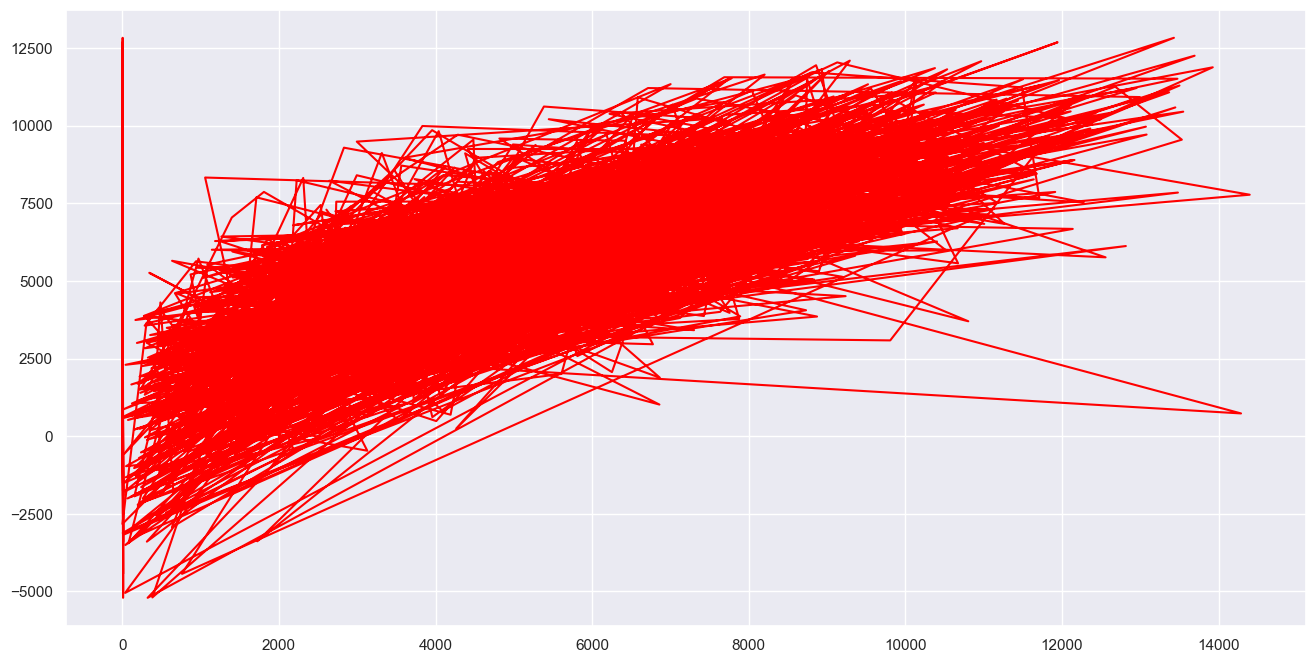

In [32]:
# Plotting the predictions
f = plt.figure(figsize=(16, 8))
plt.plot(Predictor_2var_test, Rank_pred_poly2_model, color='red', label='Polynomial Regression')
plt.show()

Now that we have the model, we calculate the same metrics as before (in 5.d.p. as well)  

1. Mean Squared Error (MSE): The average of the squared differences between the predicted values and the actual values
2. Root Mean Squared Error (RMSE): A measure of the average magnitude of the errors in the predicted values
3. Mean Absolute Error (MAE): The average of the absolute differences between the predicted values and the actual values
4. Coefficient of Deterimination (R^2): The proportion of the variance in the target variable that is explained by the model

In [33]:
# Calculating mean squared error
from sklearn.metrics import mean_squared_error
mse_poly2 = mean_squared_error(Response_test, Rank_pred_poly2_model)
print(f"Mean Squared Error: {mse_poly2:.5f}")

# Calculaing root mean squared error
rmse_poly2 = mean_squared_error(Response_test, Rank_pred_poly2_model, squared = False)
print(f"Root Mean Squared Error: {rmse_poly2:.5f}")

# Calculating mean absolute error
from sklearn.metrics import mean_absolute_error
mae_poly2 = mean_absolute_error(Response_test, Rank_pred_poly2_model)
print(f"Mean Absolute Error: {mae_poly2:.5f}")

# Calculating coefficient of determination
from sklearn.metrics import r2_score
r2_poly2 = r2_score(Response_test, Rank_pred_poly2_model)
print(f"R-squared Score: {r2_poly2:.5f}")

Mean Squared Error: 5770838.65480
Root Mean Squared Error: 2402.25699
Mean Absolute Error: 1681.64978
R-squared Score: 0.60760


### Degree-3 Model

There does seem to be some improvement, so perhaps an even higher degree will help more?

In [34]:
from sklearn.preprocessing import PolynomialFeatures

# Set the degree of the polynomial
degree = 3

We will be re-using the previous train and test sets, Predictor_2var and Response, except they will now be converted into polynomial features

In [35]:
# Conversion of Predictor_2var_train into polynomial feature
poly3_features = PolynomialFeatures(degree=degree)
Predictor_2var_poly3 = poly3_features.fit_transform(Predictor_2var_train)

# Conversion of Predictor_2var_test into polynomial feature
Predictor_2var_test_poly3 = poly3_features.transform(Predictor_2var_test)

We can then train the model using said polynomial features, and use it to make predictions on the training set for Rank

In [36]:
# Training the model
poly3_model = LinearRegression()
poly3_model.fit(Predictor_2var_poly3, Response_train)

# Predict Rank for test set
Rank_pred_poly3_model = poly3_model.predict(Predictor_2var_test_poly3)

We then plot the resulting predictions to check if anything looks unusual

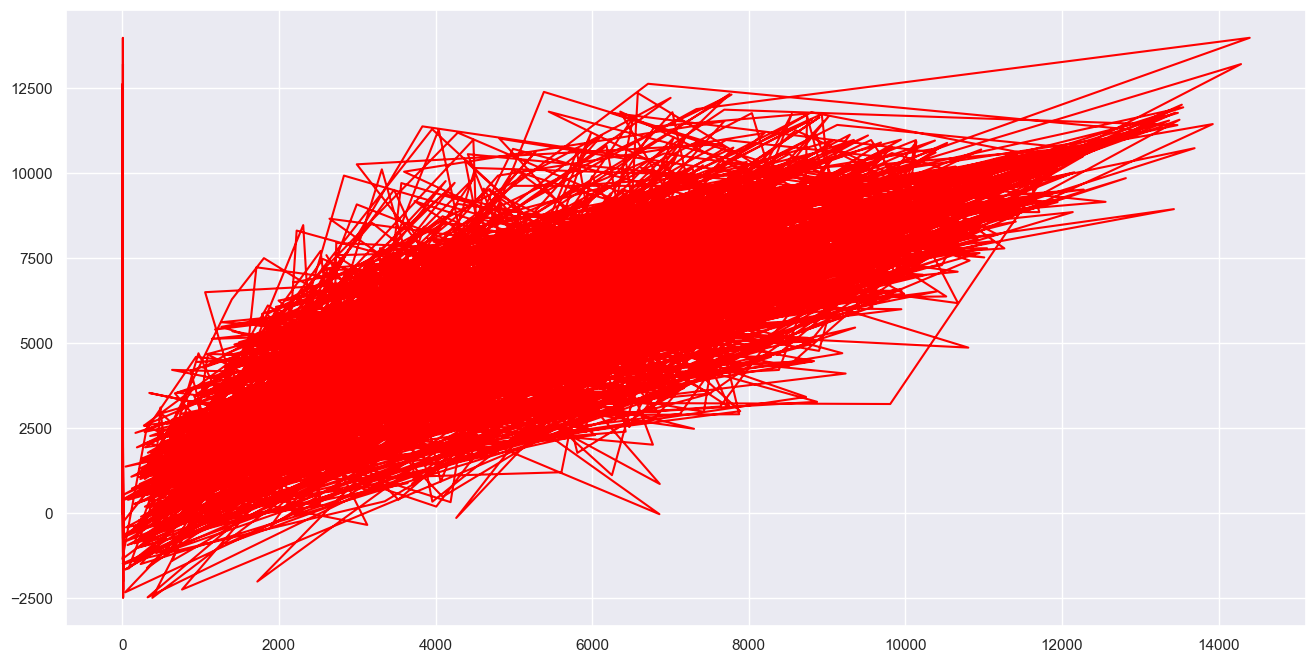

In [37]:
# Plotting the predictions
f = plt.figure(figsize=(16, 8))
plt.plot(Predictor_2var_test, Rank_pred_poly3_model, color='red', label='Polynomial Regression')
plt.show()

Now that we have the model, same metrics, same decimal places...  

1. Mean Squared Error (MSE): The average of the squared differences between the predicted values and the actual values
2. Root Mean Squared Error (RMSE): A measure of the average magnitude of the errors in the predicted values
3. Mean Absolute Error (MAE): The average of the absolute differences between the predicted values and the actual values
4. Coefficient of Deterimination (R^2): The proportion of the variance in the target variable that is explained by the model

To calculate how good it is at predicting Rank

In [38]:
# Calculating mean squared error
from sklearn.metrics import mean_squared_error
mse_poly3 = mean_squared_error(Response_test, Rank_pred_poly3_model)
print(f"Mean Squared Error: {mse_poly3:.5f}")

# Calculaing root mean squared error
rmse_poly3 = mean_squared_error(Response_test, Rank_pred_poly3_model, squared = False)
print(f"Root Mean Squared Error: {rmse_poly3:.5f}")

# Calculating mean absolute error
from sklearn.metrics import mean_absolute_error
mae_poly3 = mean_absolute_error(Response_test, Rank_pred_poly3_model)
print(f"Mean Absolute Error: {mae_poly3:.5f}")

# Calculating coefficient of determination
from sklearn.metrics import r2_score
r2_poly3 = r2_score(Response_test, Rank_pred_poly3_model)
print(f"R-squared Score: {r2_poly3:.5f}")

Mean Squared Error: 5307388.83430
Root Mean Squared Error: 2303.77708
Mean Absolute Error: 1582.50194
R-squared Score: 0.63912


### Evaluation

The results are in! Let's see which model is the most accurate, out of all of them  
All results will be rounded off the 5 d.p. for consistency  
Also note that we will NOT be comparing against the 3-var linear regression model, because it was not trained using the 2-var train set, nor evaluated using the 2-var test set

Here's what each metric means, in case you forgot
> A lower MSE indicates better performance (0 lowest)  
> A lower RMSE indicates better performance (0 lowest)  
> A lower MAE indicates better performance (0 lowest)  
> A higher R^2 indicates better performance (1 highest)  

These are the results for the 2-var linear regression model:
* Mean Squared Error: 6031835.24243
* Root Mean Squared Error: 2455.97949
* Mean Absolute Error: 1607.94734
* R-squared Score: 0.58986

This is what we got for degree 2 polynomial regression:
* Mean Squared Error: 5770838.65480
* Root Mean Squared Error: 2402.25699
* Mean Absolute Error: 1681.64978
* R-squared Score: 0.60760

And this is what we ended up with going to degree 3 polynomial regression:
* Mean Squared Error: 5307388.83430
* Root Mean Squared Error: 2303.77708
* Mean Absolute Error: 1582.50194
* R-squared Score: 0.63912

Polynomial regression far outpaces both forms of linear regression (even the degree 2 model has a roughly 0.018 point improvement in R^2, compared to 2-var linear regression). Degree 3 polynomial regression is the best model so far, sporting a further 0.032 point R^2 improvement over degree 2 polynomial regression  

Due to the marginal accuracy increase derived from upping the degree (as well as the risk of overfitting the model), we have chosen to stop at degree 3 for now

### Retrieving the formula

To end off, let us retrieve the formulas for our chosen linear and polynmial regression functions

In [39]:
# For linear regression
# Retrieve the coefficients and intercept 
coefficients_2var = linear_reg_model_2var.coef_
intercept_2var = linear_reg_model_2var.intercept_

# Construct the formula
formula = f"Rank = {intercept_2var:.2f} + "
for i, coef in enumerate(coefficients_2var):
    formula += f"({coef:.2f} * Predictor_{i+1}) + "

# Remove the trailing '+' and whitespace
formula = formula[:-3]

print("Formula:", formula)

Formula: Rank = 22865.49 + (-2755.50 * Predictor_1) + (0.24 * Predictor_2)


The linear regression formula is thus:  
Rank = 22865.49 + (-2755.50 * Score) + (0.24 * Popularity)

In [40]:
# For polynomial regression
# Extract coefficients and intercept
coefficients_poly3 = poly3_model.coef_
intercept_poly3 = poly3_model.intercept_

# Construct the formula
formula = f'y = {intercept_poly3:.2f}'
for i, coef in enumerate(coefficients_poly3):
    formula += f' + {coef:.2f} * x^{i+1}'

print("Formula:", formula)

Formula: y = -30645.91 + 0.00 * x^1 + 15003.61 * x^2 + 7.55 * x^3 + -2031.27 * x^4 + -0.90 * x^5 + -0.00 * x^6 + 79.65 * x^7 + 0.01 * x^8 + 0.00 * x^9 + 0.00 * x^10


The polynomial regression formula is thus:  
Rank = -30645.91 * x^1 + 15003.61 * x^2 + 7.55 * x^3 + -2031.27 * x^4 + -0.90 * x^5 + 79.65 * x^7 + 0.01 * x^8